# In this Analysis we will be taking a look at a dataset consisting of data related jobs postings as well as some other jobs.






## First the dataset needs to be cleaned and formatted.

In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('/content/data_jobs.csv')

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [4]:
df0.shape

(785741, 17)

In [5]:
df0.drop_duplicates(inplace=True)

In [6]:
len(df0)

785640

In [7]:
df0['job_posted_date'] = pd.to_datetime(df0['job_posted_date'])

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785640 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785640 non-null  object        
 1   job_title              785639 non-null  object        
 2   job_location           784595 non-null  object        
 3   job_via                785632 non-null  object        
 4   job_schedule_type      772975 non-null  object        
 5   job_work_from_home     785640 non-null  bool          
 6   search_location        785640 non-null  object        
 7   job_posted_date        785640 non-null  datetime64[ns]
 8   job_no_degree_mention  785640 non-null  bool          
 9   job_health_insurance   785640 non-null  bool          
 10  job_country            785591 non-null  object        
 11  salary_rate            33066 non-null   object        
 12  salary_year_avg        22002 non-null   float64  

In [9]:
df0['job_skills'] = df0['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Part 1)
## In this part of the analysis we will try to get some brief insights about these job postings around the world.

## 1) No. of jobs by country.

## 2) Percentage of Jobs by Title.

## 3) Median Salary by Country and the top Data Job Titles.

In [10]:
df1 = df0.copy()

In [11]:
df1_plot_1 = df1['job_country'].value_counts().head(20).reset_index()

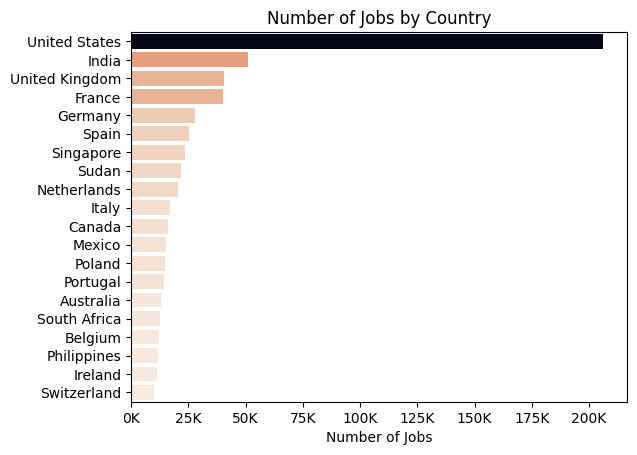

In [12]:
sns.barplot(data = df1_plot_1, y = 'job_country', x = 'count', hue = 'count', palette = 'rocket_r')
plt.legend().remove()
plt.ylabel('Country')
plt.title('Number of Jobs by Country')
plt.xlabel('Number of Jobs')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.ylabel('')
plt.show()

* The bar chart above gives us an idea of where these jobs are located.
* In the bar chart above we can see that most of the jobs postings is for the United States.
* The counts for job postings in countries following such as India, United Kingdom and France are much lower.  


In [13]:
df1_plot_2 = df1['job_title_short'].value_counts().head(20).reset_index()

In [14]:
df1_c1 = df1['job_title_short'].notna().sum()

In [15]:
df1_plot_2['perc'] = (df1_plot_2['count'] / df1_c1) * 100

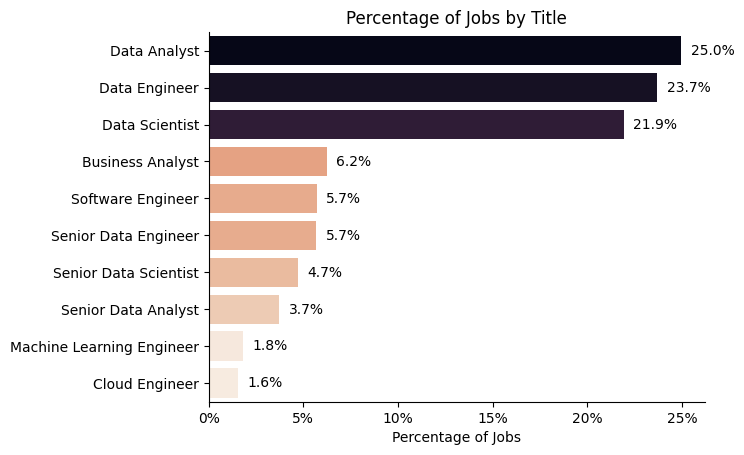

In [16]:
sns.barplot(data = df1_plot_2, y = 'job_title_short', x = 'perc', hue = 'perc', palette = 'rocket_r')
sns.despine()
plt.legend().remove()
plt.ylabel('')
plt.xlabel('Percentage of Jobs')
plt.title('Percentage of Jobs by Title')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
for i, v in enumerate(df1_plot_2['perc']):
  plt.text(v + 0.5, i, f'{v:.1f}%', va = 'center')

* The bar chart above gives us an idea of what job titles are requested.

* We can wee that the top 3 job title counts are Data Analyst, Data Engineer and Data Scientists accounting for 70.6% percent of the job postings.



In [17]:
df1_plot_3_pivot = df1.pivot_table(index = 'job_country', columns = 'job_title_short', values = 'salary_year_avg', aggfunc = 'median')

In [18]:
df1_plot_3_pivot = df1_plot_3_pivot.loc[df1_plot_1['job_country'].head(5)]

In [19]:
df1_plot_3_pivot = df1_plot_3_pivot[df1_plot_2['job_title_short'].head(3)]

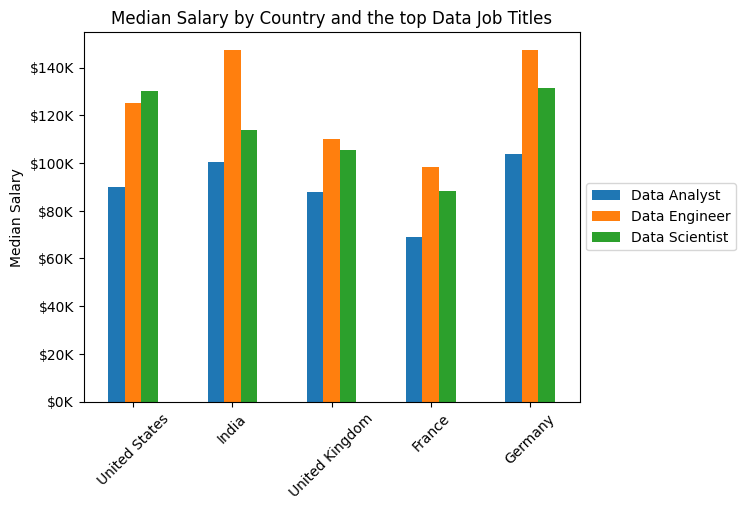

In [20]:
df1_plot_3_pivot.plot(kind = 'bar')
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.ylabel('Median Salary')
plt.xlabel('')
plt.title('Median Salary by Country and the top Data Job Titles')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000):,}K'))
plt.xticks(rotation = 45)
plt.show()

* This bar chart gives a rough comparison of the Median Salary of the top 3 job titles in the top 5 countries.
* We can see that in all countries that Data Analysts are the least paid and Data Engineers are the most paid except for the United States where Data Scientists are the most paid.
* We can also see that the rough pay for these jobs seems to be higher in Germany and India followed by the United States.
* These jobs in countries like United Kingdom and France seem to have a lower pay with France being the least.




# Part 2)
## In this part of the analysis we will focus on the these jobs postings located in the United States.

## 1) Number of Jobs by Location in United States.

## 2) Number of Jobs by Company in United States.

## 3) Percentage of Jobs Titles in United States.

## 4) Percentage of Jobs by Job Board in United States.

## 5) Percentage of Jobs by Schedule Type in United States.

## 6) Work From Home in United States.

## 7) Health Insurance in United States.

## 8) Degree Required for the top data jobs in United States.

## 9) Number of Jobs Postings by Month in United States.

In [21]:
df2 = df0.copy()

In [22]:
df2_US = df2[df2['job_country'] == 'United States']

In [23]:
df2_US['degree_required'] = df2_US['job_no_degree_mention'].apply(lambda x: 'Yes' if x == False else 'No')

<ipython-input-23-9832082e4b4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_US['degree_required'] = df2_US['job_no_degree_mention'].apply(lambda x: 'Yes' if x == False else 'No')


In [24]:
df2_US['insurance_provided'] = df2_US['job_health_insurance'].apply(lambda x: 'No' if x == False else 'Yes')

<ipython-input-24-9771bcf2f63b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_US['insurance_provided'] = df2_US['job_health_insurance'].apply(lambda x: 'No' if x == False else 'Yes')


In [25]:
df2_US['work_from_home'] = df2_US['job_work_from_home'].apply(lambda x: 'No' if x == False else 'Yes')

<ipython-input-25-0d70fc1a7a18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_US['work_from_home'] = df2_US['job_work_from_home'].apply(lambda x: 'No' if x == False else 'Yes')


In [26]:
len(df2_US)

206287

In [27]:
print(f"Number of remote jobs with location 'Anywhere' {df2_US[(df2_US['job_location'] == 'Anywhere') & (df2_US['work_from_home'] == 'Yes')].shape[0]}")
print(f"Number of on-site jobs with location 'Anywhere' {df2_US[(df2_US['job_location'] == 'Anywhere') & (df2_US['work_from_home'] == 'No')].shape[0]}")

Number of remote jobs with location 'Anywhere' 23019
Number of on-site jobs with location 'Anywhere' 0


In [28]:
print(f"Number of remote jobs with location 'United States' {df2_US[(df2_US['job_location'] == 'United States') & (df2_US['work_from_home'] == 'Yes')].shape[0]}")
print(f"Number of on-site jobs with location 'United States' {df2_US[(df2_US['job_location'] == 'United States') & (df2_US['work_from_home'] == 'No')].shape[0]}")

Number of remote jobs with location 'United States' 0
Number of on-site jobs with location 'United States' 4957


In [29]:
df2_plot_1 = df2_US['job_location'].value_counts().reset_index().head(10)

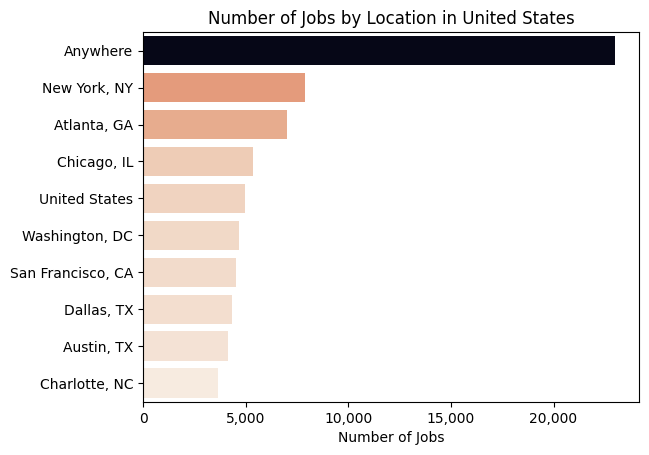

In [30]:
sns.barplot(data = df2_plot_1, x = 'count', y = 'job_location', hue = 'count', palette = 'rocket_r')
plt.legend().remove()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs by Location in United States')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

* This bar chart here shows where in the United States these jobs are located.
* Few things to note here are the 'Anywhere' and the 'United States'.
* The 'Anywhere' most likely represents remote jobs and 'United States' most likely represent jobs in multiple branches or areas in the United States.
* The bar chart here shows the 'Anywhere' count to be much higher than the rest.


In [31]:
df2_plot_2 = df2_US['company_name'].value_counts().reset_index().head(20)

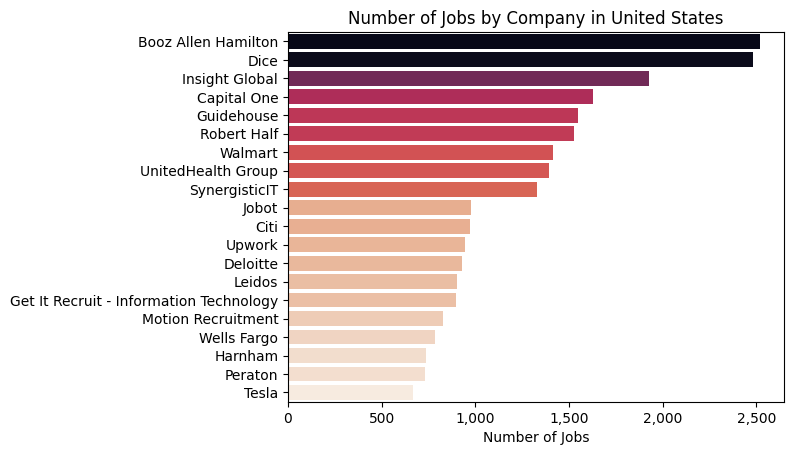

In [32]:
sns.barplot(data = df2_plot_2, x = 'count', y = 'company_name', hue = 'count', palette = 'rocket_r')
plt.legend().remove()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs by Company in United States')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

* This bar chart shows the top recruiters in the United States.
* Here we can see Booz Allen Hamilton and Dice to be the top recruiters followed by other big names such as Walmart, Citi and Deloitte.

In [33]:
df2_plot_3 = df2_US['job_title_short'].value_counts().reset_index()
df2_plot_3_c = df2_plot_3['count'].sum()

In [34]:
df2_plot_3['perc'] = (df2_plot_3['count'] / df2_plot_3_c) * 100

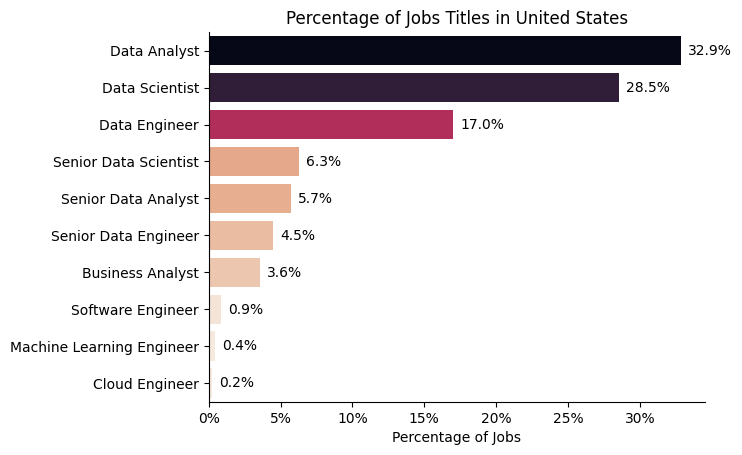

In [35]:
sns.barplot(data = df2_plot_3, x = 'perc', y = 'job_title_short', hue = 'perc', palette = 'rocket_r')
sns.despine()
plt.legend().remove()
plt.xlabel('Percentage of Jobs')
plt.ylabel('')
plt.title('Percentage of Jobs Titles in United States')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
for i, v in enumerate(df2_plot_3['perc']):
  plt.text(v + 0.5, i, f'{v:.1f}%', va = 'center')
plt.show()

* This bar chart shows the job titles counts in the United States.
* It is similar to the bar chart created for the job titles count for the World with a few changes.
* The top 3 job titles are still Data Analyst, Data Scientist and Data Engineer.
* The count of the Data Engineer seems to be a bit lower compared to the World job title counts chart.



In [36]:
df2_plot_4 = df2_US['job_via'].value_counts().reset_index().head(10)
df2_plot_4['job_via'] = df2_plot_4['job_via'].str.replace('via', '')

In [37]:
df2_plot_4_c = df2_US['job_via'].notna().sum()

In [38]:
df2_plot_4['perc'] = (df2_plot_4['count'] / df2_plot_4_c) * 100

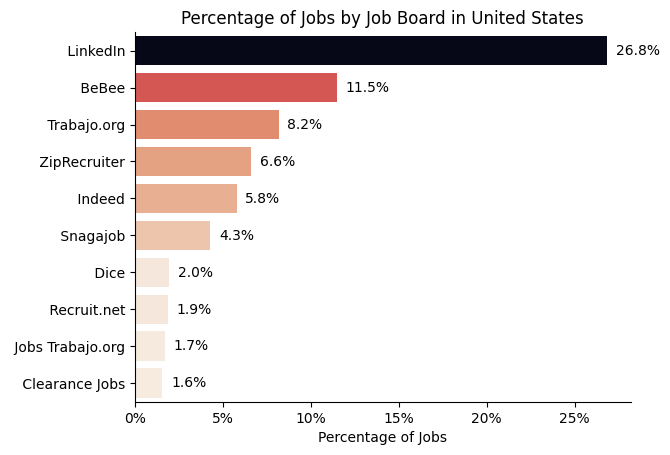

In [39]:
sns.barplot(data = df2_plot_4, x = 'perc', y = 'job_via', hue = 'perc', palette = 'rocket_r')
sns.despine()
plt.legend().remove()
plt.xlabel('Percentage of Jobs')
plt.ylabel('')
plt.title('Percentage of Jobs by Job Board in United States')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
for i, v in enumerate(df2_plot_4['perc']):
  plt.text(v + 0.5, i, f'{v:.1f}%', va = 'center')
plt.show()

* The bar chart here shows Job Board counts in the United States.
* We can see here Linkedin has the highest count and much higher than the other Job Boards.


In [40]:
df2_plot_5 = df2_US['job_schedule_type'].value_counts().reset_index().head(10)

In [41]:
df2_plot_5 = df2_plot_5[df2_plot_5['job_schedule_type'].isin(['Full-time', 'Part-time', 'Internship','Contractor'])]

In [42]:
df2_plot_5_c = df2_US['job_schedule_type'].notna().sum()

In [43]:
df2_plot_5['perc'] = (df2_plot_5['count'] / df2_plot_5_c) * 100

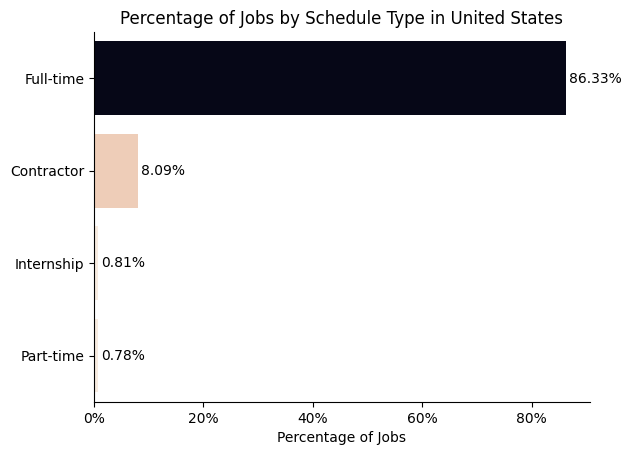

In [44]:
sns.barplot(data = df2_plot_5, x = 'perc', y = 'job_schedule_type', hue = 'perc', palette = 'rocket_r')
sns.despine()
plt.legend().remove()
plt.xlabel('Percentage of Jobs')
plt.ylabel('')
plt.title('Percentage of Jobs by Schedule Type in United States')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
for i, v in enumerate(df2_plot_5['perc']):
  plt.text(v + 0.5, i, f'{v:.2f}%', va = 'center')
plt.show()

* This bar chart shows that according to the United States dataset Full-Time jobs have the highest count.
* One thing to note here is that there were other job schedule types but I only included the ones above since I thought they were the most relevant.



In [45]:
df2_plot_6 = df2_US['work_from_home'].value_counts().reset_index()

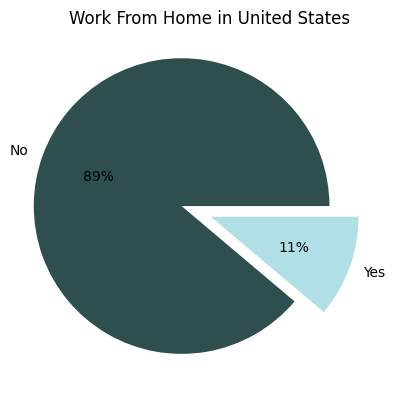

In [46]:
plt.pie(data = df2_plot_6, x = 'count', labels = 'work_from_home', autopct = '%.0f%%', colors = ['darkslategray', 'powderblue'], explode = (0.2, 0.01))
plt.title('Work From Home in United States')
plt.show()

* This pie chart shows that 11% of job postings offer work from home.
* In the job location bar chart we saw that the 'Anywhere' count to be the highest but the percentage for all the jobs postings in the United States that do not offer work from home is much higher as shown by this pie chart.

In [47]:
df2_plot_7 = df2_US['insurance_provided'].value_counts().reset_index()

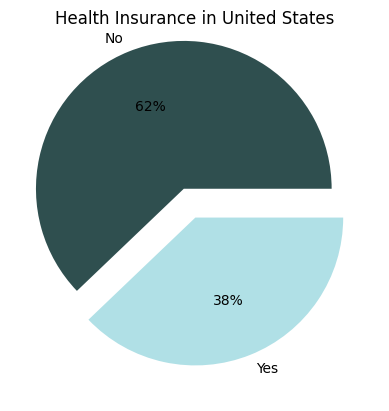

In [48]:
plt.pie(data = df2_plot_7, x = 'count', labels = 'insurance_provided', autopct = '%.0f%%', colors = ['darkslategray', 'powderblue'], explode = (0.2, 0.01))
plt.title('Health Insurance in United States')
plt.show()

* This pie chart shows that only 38% of job postings offer health insurance.

In [49]:
df2_US_job_title = df2_US['job_title_short'].value_counts().reset_index()

In [50]:
df2_US_job_title_data = df2_US_job_title['job_title_short'].head(3).to_list()

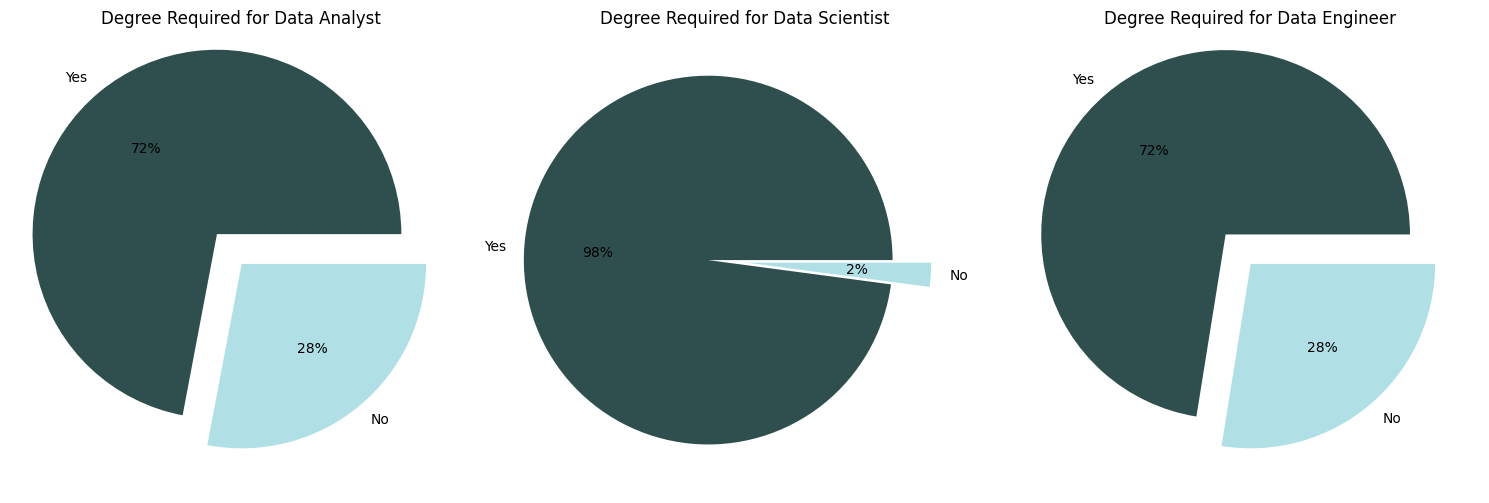

In [51]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
for i, job in enumerate(df2_US_job_title_data):
  df2_plot_8 = df2_US['degree_required'][df2_US['job_title_short'] == job]
  df2_plot_8 = df2_plot_8.value_counts().reset_index()
  ax[i].pie(data = df2_plot_8, x = 'count', labels = 'degree_required', autopct = '%.0f%%', colors = ['darkslategray', 'powderblue'], explode = (0.2, 0.01))
  ax[i].set_title(f'Degree Required for {job}')

plt.tight_layout()
plt.show()

* These pie charts show percentage of degree required the top 3 data jobs.
* A degree is highly recommended for Data Analyst and Data Engineer jobs since the majority of job postings for those job titles requires a degree.
* A degree is almost a requirement for Data Scientist jobs with 98% job postings for Data Scientists requiring a degree.


In [52]:
df2_US['month'] = df2_US['job_posted_date'].dt.month

<ipython-input-52-1ad60ff2b14a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_US['month'] = df2_US['job_posted_date'].dt.month


In [53]:
df2_US_pivot = df2_US.pivot_table(index = 'month', columns = 'job_title_short', aggfunc = 'size')
df2_US_pivot.reset_index(inplace = True)
df2_US_pivot['month'] = df2_US_pivot['month'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df2_US_pivot.set_index('month', inplace = True)
df2_US_pivot_1 = df2_US_pivot[df2_US_job_title_data]

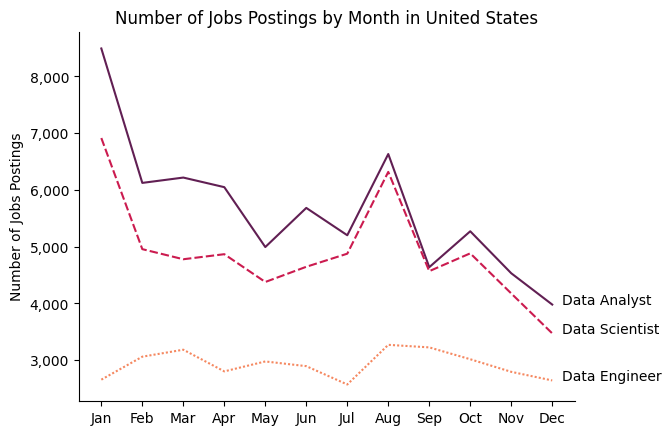

In [54]:
sns.lineplot(data = df2_US_pivot_1, palette = 'rocket')
plt.legend().remove()
sns.despine()
plt.xlabel('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

for i in range(df2_US_pivot_1.shape[1]):
  plt.text(11.25, df2_US_pivot_1.iloc[-1,i], df2_US_pivot_1.columns[i])

plt.ylabel('Number of Jobs Postings')
plt.title('Number of Jobs Postings by Month in United States')

plt.show()

* This line chart here shows when during the year these jobs are posted for the top 3 data positions.
* The line plot shows that job postings for Data Analyst and Data Scientist are high in early parts of the year with spikes around July-August.
* The number of job posting are about the same for Data Engineer with a spike around July-August.


# Part 3)
## In this part of the analysis we will try gain some insights about the salaries.
## We will also focus on the skills and salary analysis for the top 3 data postions(Data Analyst, Data Engineer and Data Scientist).

## 1) Median Salary by Job Title in the United States.

## 2) Top 5 Skills for the top Data Jobs in the United States

## 3) Scatter plots of percentage of skills and median salary for the top Data Jobs in the United States.

In [55]:
df2_plot_10 = df2_US.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).reset_index()

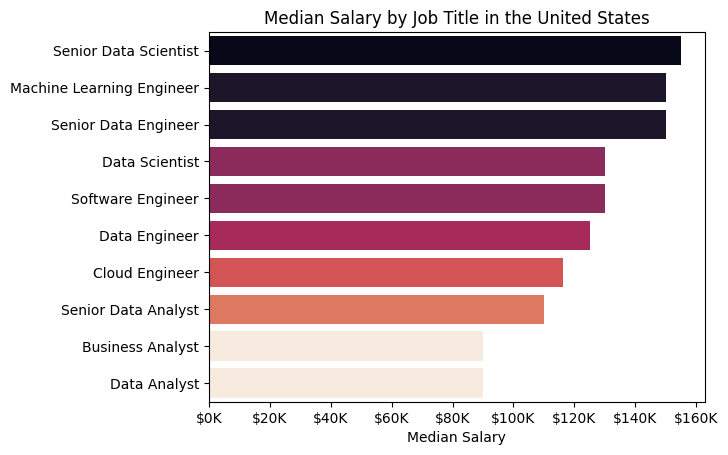

In [56]:
sns.barplot(data = df2_plot_10, x = 'salary_year_avg', y = 'job_title_short', hue = 'salary_year_avg', palette = 'rocket_r')
plt.legend().remove()
plt.xlabel('Median Salary')
plt.ylabel('')
plt.title('Median Salary by Job Title in the United States')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}K'.format(x / 1000)))
plt.show()

* This bar chart shows the median salary of each job title in the United States.
* Here we can see that Senior Data Scientist, Machine Learning Engineer and Senior Data Engineer are the most paid.
* Here we can also see that Data Analyst and Business Analyst has the least median pay.
* One more thing to note is that the median pay for Senior Data Analyst is less than other senior titles as well as other junior titles.

In [57]:
df3 = df0.copy()

In [58]:
df3_US = df3[df3['job_country'] == 'United States']

In [59]:
len(df3_US)

206287

In [60]:
df3_job_count = df3_US['job_title_short'].value_counts().reset_index(name = 'title_count')

In [61]:
df3_job_count['title_count'].sum()

206287

In [62]:
df3_US_exploded = df3_US.explode('job_skills')

In [63]:
df3_US_skills = df3_US_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name = 'skill_count').sort_values(by = 'skill_count', ascending = False)

In [64]:
df3_US_merged = pd.merge(df3_US_skills, df3_job_count, how = 'left', on = 'job_title_short')

In [65]:
df3_US_merged['skill_perc'] = (df3_US_merged['skill_count'] / df3_US_merged['title_count']) * 100

In [66]:
df3_job_count_data = df3_job_count['job_title_short'].head(3).to_list()

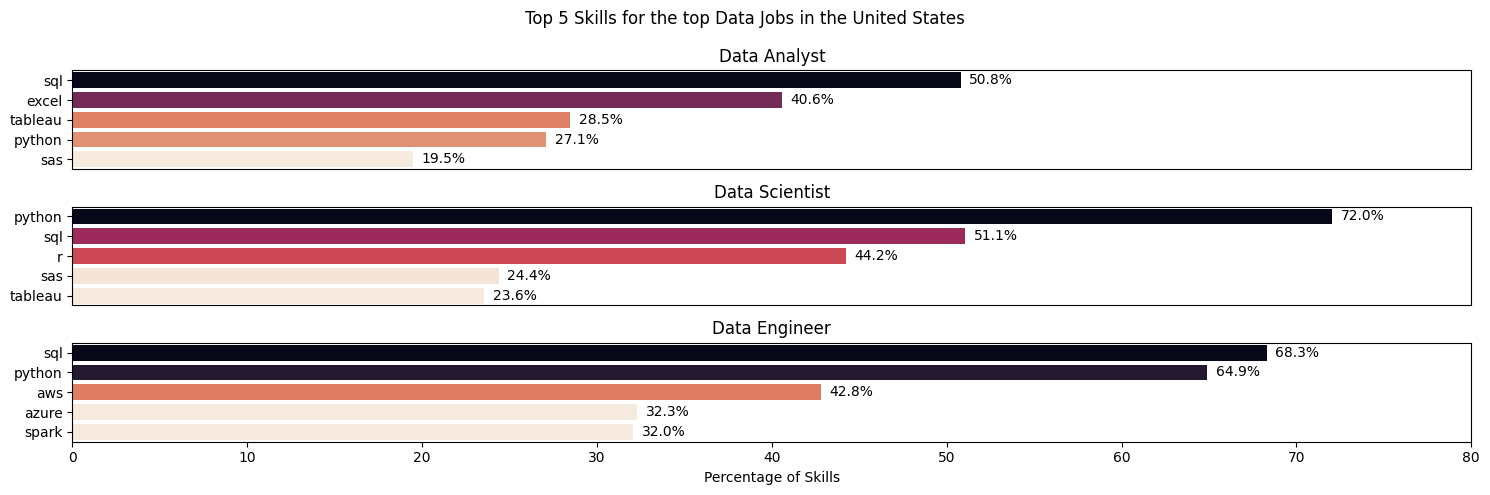

In [67]:
fig, ax = plt.subplots(len(df3_job_count_data), 1, figsize = (15, 5))

for i, job in enumerate(df3_job_count_data):
  df3_plot_1 = df3_US_merged[['job_skills', 'skill_perc']][df3_US_merged['job_title_short'] == job].head(5)
  sns.barplot(data = df3_plot_1, x = 'skill_perc', y = 'job_skills', palette = 'rocket_r', hue = 'skill_perc', ax = ax[i])
  ax[i].legend().remove()
  ax[i].set_title(f'{job}')
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].set_xlim(0, 80)
  for n, v in enumerate(df3_plot_1['skill_perc']):
        ax[i].text(v + 0.5, n, f'{v:.1f}%', va = 'center')
  if i != len(df3_job_count_data) - 1:
    ax[i].set_xticks([])

plt.xlabel('Percentage of Skills')
plt.suptitle('Top 5 Skills for the top Data Jobs in the United States')
plt.tight_layout()
plt.show()

* These bar charts gives us an insight abouth the skills demand for each job title and what kind of work is expected to be done by these roles.

* With Data Analyst we can see that sql is the most demanded skill followed by excel and tableau. This indicates that Data Analysts are expected to query and manupilate data and use other tools visualize and present findings.

* With Data Scientists we can see that python is the most demanded skill followed by sql and r. Since Data Scientists are expected to perform statistical analysis along with creating machine learning models we can see the high demand for python and r. Skill such as sql could be used for database querying and management.

* With Data Engineer we can see that sql is also the most demanded skill followed by python and aws. This indicates the Data Engineers are expected to manage, organize and prepare databases.



In [68]:
!pip install adjustText

In [69]:
from adjustText import adjust_text

In [70]:
df4 = df0.copy()

In [71]:
df4_job_title = df4['job_title_short'].value_counts().index[:3].to_list()

In [72]:
df4_df = [df4[(df4['job_country'] == 'United States') & (df4['job_title_short'] == title)] for title in df4_job_title]
df4_US_DA = df4_df[0]
df4_US_DS = df4_df[2]
df4_US_DE = df4_df[1]

In [73]:
df4_US_DA_exploded = df4_US_DA.explode('job_skills')

In [74]:
df4_US_DA_grouped = df4_US_DA_exploded.groupby('job_skills').agg(skill_count = ('job_skills', 'size'), median_salary = ('salary_year_avg', 'median')).reset_index().sort_values(by = 'skill_count', ascending = False)
df4_plot_1 = df4_US_DA_grouped.head(13).copy()
df4_plot_1['skill_perc'] = (df4_plot_1['skill_count'] / len(df4_US_DA)) * 100

In [75]:
df4_US_DS_exploded = df4_US_DS.explode('job_skills')

In [76]:
df4_US_DS_grouped = df4_US_DS_exploded.groupby('job_skills').agg(skill_count = ('job_skills', 'size'), median_salary = ('salary_year_avg', 'median')).reset_index().sort_values(by = 'skill_count', ascending = False)
df4_plot_2 = df4_US_DS_grouped.head(13).copy()
df4_plot_2['skill_perc'] = (df4_plot_2['skill_count'] / len(df4_US_DS)) * 100

In [77]:
df4_US_DE_exploded = df4_US_DE.explode('job_skills')

In [78]:
df4_US_DE_grouped = df4_US_DE_exploded.groupby('job_skills').agg(skill_count = ('job_skills', 'size'), median_salary = ('salary_year_avg', 'median')).reset_index().sort_values(by = 'skill_count', ascending = False)
df4_plot_3 = df4_US_DE_grouped.head(13).copy()
df4_plot_3['skill_perc'] = (df4_plot_3['skill_count'] / len(df4_US_DE)) * 100

## Scatter plots of percentage of skills and median salary for the top Data Jobs in the United States

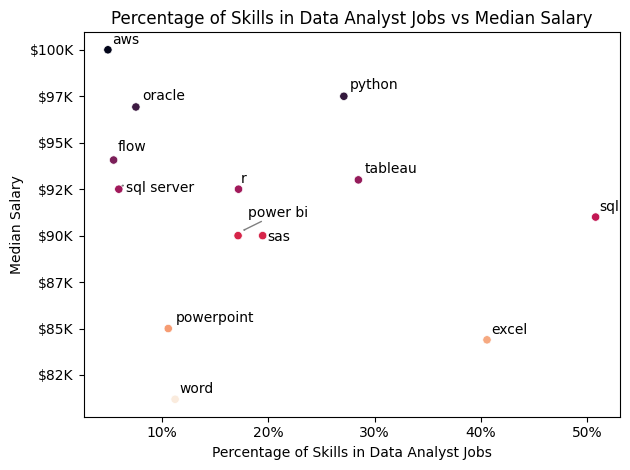

In [82]:
sns.scatterplot(data = df4_plot_1, x = 'skill_perc', y = 'median_salary', palette = 'rocket_r', hue = 'median_salary')
plt.legend().remove()
plt.title('Percentage of Skills in Data Analyst Jobs vs Median Salary')
plt.xlabel('Percentage of Skills in Data Analyst Jobs')
plt.ylabel('Median Salary')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000):,}K'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
texts = []
for i, v in enumerate(df4_plot_1['skill_perc']):
  text = plt.text(v + 0.2,  df4_plot_1['median_salary'].iloc[i] + 200, df4_plot_1['job_skills'].iloc[i], fontsize = 10)
  texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))
plt.tight_layout()
plt.show()

* Here we can see sql and excel are popular skills but have medium to low median salary.
* Skills such as aws and oracle have high median salary but don't have highe popularity.
* Skill such as python seems to have a good balance of popularity and median salary.

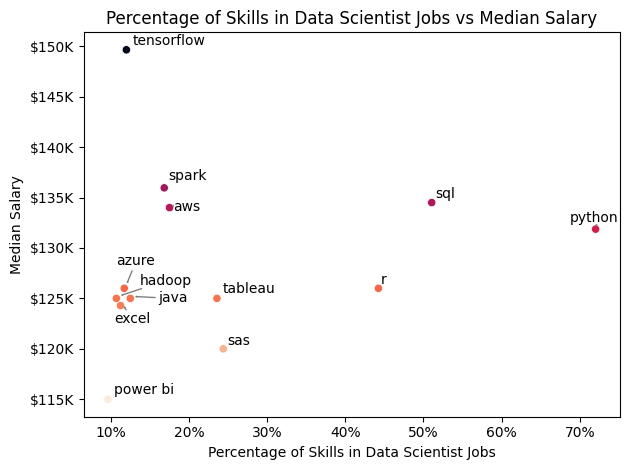

In [83]:
sns.scatterplot(data = df4_plot_2, x = 'skill_perc', y = 'median_salary', palette = 'rocket_r', hue = 'median_salary')
plt.legend().remove()
plt.title('Percentage of Skills in Data Scientist Jobs vs Median Salary')
plt.xlabel('Percentage of Skills in Data Scientist Jobs')
plt.ylabel('Median Salary')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000):,}K'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
texts = []
for i, v in enumerate(df4_plot_2['skill_perc']):
  text = plt.text(v + 0.2,  df4_plot_2['median_salary'].iloc[i] + 200, df4_plot_2['job_skills'].iloc[i], fontsize = 10)
  texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))
plt.tight_layout()
plt.show()

* Here we can see that python and sql seem to be popular and have a medium median salary.
* Skill like tensorflow have a very a high median pay but aren't very popular.

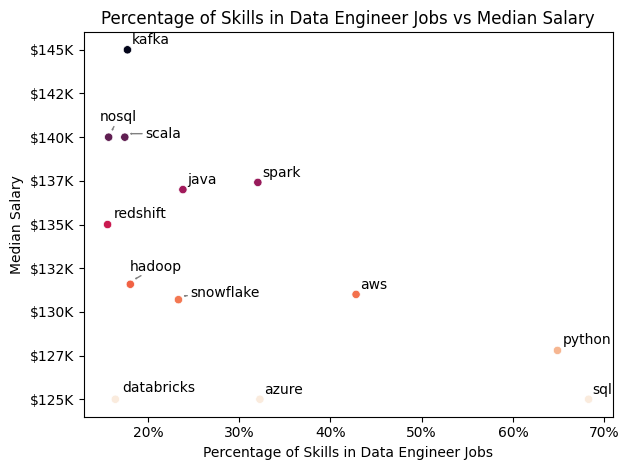

In [84]:
sns.scatterplot(data = df4_plot_3, x = 'skill_perc', y = 'median_salary', palette = 'rocket_r', hue = 'median_salary')
plt.legend().remove()
plt.title('Percentage of Skills in Data Engineer Jobs vs Median Salary')
plt.xlabel('Percentage of Skills in Data Engineer Jobs')
plt.ylabel('Median Salary')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000):,}K'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
texts = []
for i, v in enumerate(df4_plot_3['skill_perc']):
  text = plt.text(v + 0.2,  df4_plot_3['median_salary'].iloc[i] + 200, df4_plot_3['job_skills'].iloc[i], fontsize = 10)
  texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))
plt.tight_layout()
plt.show()

* Here we can see that sql and python are very popular but don' have a very high median salary.
* Skill like kafka seems to have a very high median pay but isn't very popular.
* Skills like aws seems to have a good balance although knowing sql and python would be highly recommended.